In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from itertools import combinations

In [2]:
#Nをセット　！！！注意8以上は非常に長い時間がかかります！！！
N = 7
#碁盤の位置情報を(x,y)で定義する
locations = [(x,y) for y in range(N) for x in range(N)]
#位置の組合わせを生成する（重複なし）
candidate_locs = combinations(locations,N)
cnt = 0

In [3]:
def plot_chessboard(N, queens):
    """Create a chessboard with queens using matplotlib. Image is saved
    in the root directory. Returns the image file name.
    """
    chessboard = np.zeros((N,N))
    chessboard[1::2,0::2] = 1
    chessboard[0::2,1::2] = 1

    # Adjust fontsize for readability
    if N <= 10:
        fontsize = 30
    elif N <= 20:
        fontsize = 10
    else:
        fontsize = 5

    plt.xticks(np.arange(N))
    plt.yticks(np.arange(N))

    plt.imshow(chessboard, cmap='binary')

    # Place queens
    for x,y in queens:

        if x != -1 and y != -1:
            plt.text(x, y, u"\u2655", fontsize=fontsize, ha='center',
                     va='center', color='black' if (x - y) % 2 == 0 else 'white')

    # Save file in root directory
    file_name = "{}-queens-solution.png".format(N)
    plt.savefig(file_name)

In [4]:
def is_conflict(l1,l2):
    x_diff = abs(l1[0] - l2[0])
    y_diff = abs(l1[1] - l2[1])

    # 縦可、横に並んでいる場合は衝突
    if x_diff == 0 or y_diff == 0:
        return True
    #斜め方向に存在する場合は衝突
    if x_diff == y_diff:
        return True
    
    return False

In [5]:
#指定された配置に衝突がないかをチェック。Queenが全て問題なく配置されていればTrueを返す。
def is_avaiable(locs):
    #i番目のQueenの位置を取得して、i+1番目以降のQueenと衝突しないことを確認する
    #チェックするのは右、右下、下、左下のみ
    flag = True
    for i,j in combinations(range(N),2):
        if is_conflict(locs[i],locs[j]):
            flag = False
            break

    return flag

試した回数 8859383, 処理時間 7.3秒


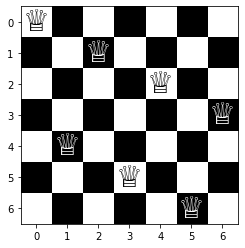

In [6]:
#メインロジック

cnt = 0
start_time = time.time()
for locs in candidate_locs:
    cnt += 1
    if is_avaiable(locs):
        break
end_time = time.time()
print(f"試した回数 {cnt}, 処理時間 {(end_time -  start_time):.1f}秒")

plot_chessboard(N,locs)